In [1]:
from qiskit import *
import numpy as np
import matplotlib as mpl
from qiskit.tools.visualization import plot_histogram, plot_state_city
from qiskit.tools.monitor import job_monitor

state_sim = Aer.get_backend('statevector_simulator')
qasm_sim = Aer.get_backend('qasm_simulator')
unitary_sim = Aer.get_backend('unitary_simulator')

qiskit.__qiskit_version__   #developed in q0.14.0, q-terra0.11.0

{'qiskit-terra': '0.11.0',
 'qiskit-aer': '0.3.4',
 'qiskit-ignis': '0.2.0',
 'qiskit-ibmq-provider': '0.4.4',
 'qiskit-aqua': '0.6.1',
 'qiskit': '0.14.0'}

In [2]:
# Definition of c_Increment, c_Decrement gates

def increment(qc,qr):
    """controlled-increment gate, cf. PhysRevA.72.032329"""
    for i in range(num_qubits - 1):
        qc.mct(qr[0:num_qubits - 1 - i], qr[num_qubits - 1 - i] , qr_aux)
        
def decrement(qc,qr):
    """controlled-decrement gate, cf. PhysRevA.72.032329"""
    for i in range(num_qubits - 1):
        qc.mct(qr[0:i+1], qr[i+1], qr_aux)
        
# Definition of QW cycle

def quantum_walk(qc,qr,num_steps):
    """implement DTQW on a previously defined circuit and register cf. PhysRevA.72.032329"""
    for i in range(num_steps):
        qc.h(qr[0])
        increment(qc,qr)
        qc.x(qr[0])
        decrement(qc,qr)
        qc.x(qr[0])
        
def get_tot_gates(qc):
    """get the total number of basic gates of a circuit"""
    tot_gates = 0

    for key in qc.decompose().count_ops():
        tot_gates = tot_gates + qc.decompose().count_ops()[key]
    
    return tot_gates

def barrier(qc,qr,qr_aux):
    """barrier gate over all quantum registers, including aux if it exists"""
    if qr_aux != None:
        qc.barrier(qr,qr_aux)
    else:        
        qc.barrier(qr)

In [3]:
# Analysis of gate number

x = []
y = []

for q in range(4,30):
    # Total number of qubits (nodes + coin)
    num_qubits = q
    
    # Define qRegister and qCircuit
    qr = QuantumRegister(num_qubits, 'qr')
    cr = ClassicalRegister(num_qubits - 1, 'cr')

    # We need (num_control - 2) aux qubits for mct
    if num_qubits > 3:
        qr_aux = QuantumRegister(num_qubits - 3, 'aux')
        qc = QuantumCircuit(qr,qr_aux,cr)
    else:
        qr_aux = None
        qc = QuantumCircuit(qr,cr)

    # Running the QW

    quantum_walk(qc,qr,1)
    
    x.append(q)
    y.append(get_tot_gates(qc))

[4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29] [101, 203, 341, 515, 725, 971, 1253, 1571, 1925, 2315, 2741, 3203, 3701, 4235, 4805, 5411, 6053, 6731, 7445, 8195, 8981, 9803, 10661, 11555, 12485, 13451]


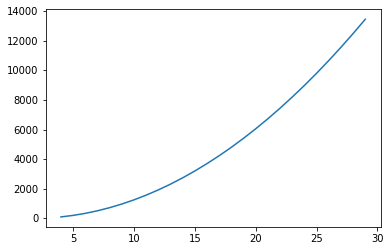

In [4]:
print(x,y)
mpl.pyplot.plot(x,y)